In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4
import scipy
from scipy import stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

zsh:1: command not found: nvidia-smi


In [2]:
# dir for mac

sst_file_dir = "/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/Data_preparation/OISST/northeast_sst.nc"
prec_file_dir = "/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/Data_preparation/TRMM/northeast_precip.nc"

In [3]:
sst_oisst = xr.open_dataarray(sst_file_dir)

sst_oisst = sst_oisst.loc[0: 8034,:, :]

precip = xr.open_dataarray(prec_file_dir)

In [4]:
sst_oisst

<xarray.DataArray 'sst' (time: 8034, lat: 122, lon: 122)>
[119578056 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 -40.12 -39.88 -39.62 -39.38 ... -10.38 -10.12 -9.875
  * lon      (lon) float64 139.9 140.1 140.4 140.6 ... 169.4 169.6 169.9 170.1
  * time     (time) float64 1.0 2.0 3.0 4.0 ... 8.032e+03 8.033e+03 8.034e+03

In [5]:
date_time = pd.date_range(start='1998-01-01', periods=8034, freq='D')

In [6]:
sst_oisst['time'] = date_time

precip['time'] = date_time

In [7]:
precip_values = precip.values
sst_values = sst_oisst.values

In [8]:
precip_sstabove26 = np.where(sst_values > 26, precip_values, np.nan)

precip_sstabove26 = xr.DataArray(precip_sstabove26, dims=['time', 'lat', 'lon'], coords=[date_time, precip.lat, precip.lon])

precip_sstbelow26 = np.where(sst_values < 26, precip_values, np.nan)

precip_sstbelow26 = xr.DataArray(precip_sstbelow26, dims=['time', 'lat', 'lon'], coords=[date_time, precip.lat, precip.lon])

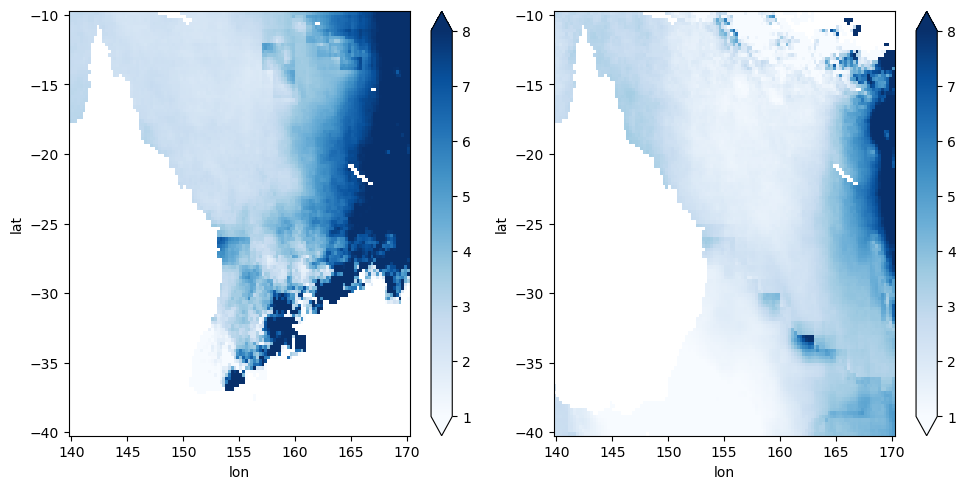

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Precipitation when SST > 26°C')
precip_sstabove26.mean(dim='time').plot(cmap='Blues', vmin=1, vmax=8)
plt.subplot(1, 2, 2)
plt.title('Precipitation when SST < 26°C')
precip_sstbelow26.mean(dim='time').plot(cmap='Blues', vmin=1, vmax=8)
plt.tight_layout()
plt.show()

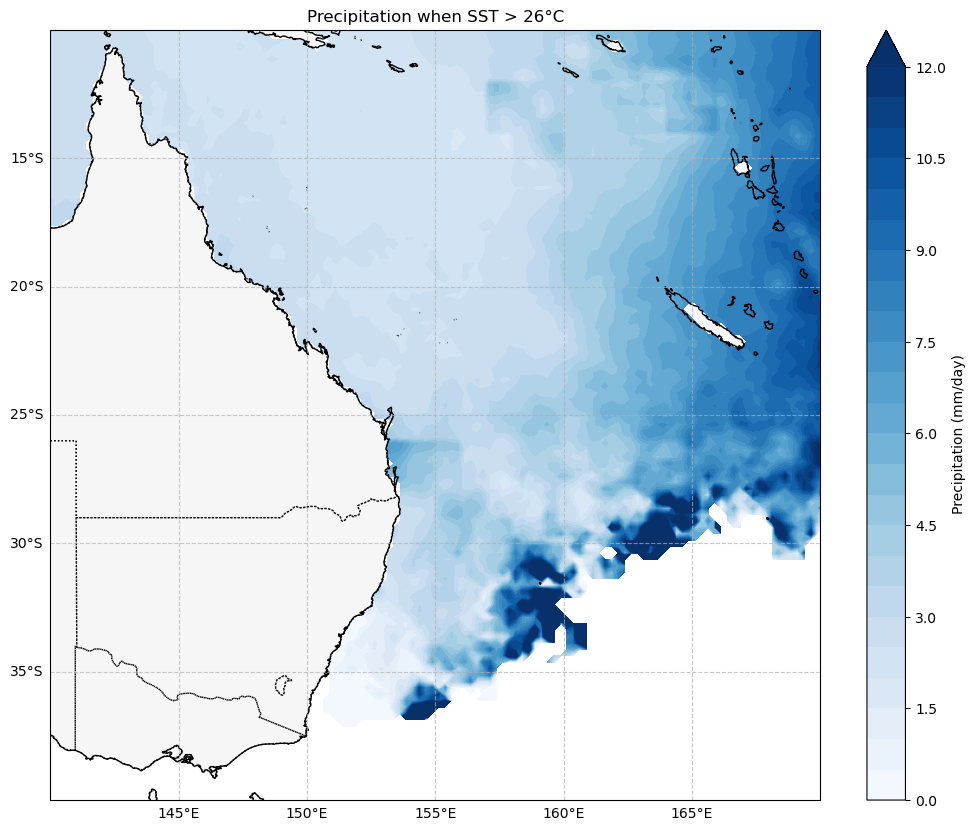

In [14]:
plt.figure(figsize=(12, 10))

# Use PlateCarree projection for Australia
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines, borders, and states
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, linestyle=':')

# Add ocean and land features
ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='lightblue', alpha=0)
ax.add_feature(cfeature.LAND, zorder=0, facecolor='lightgrey', alpha=0.2)

# Set the extent to focus on eastern Australia
ax.set_extent([140, 170, -40, -10], crs=ccrs.PlateCarree())

# Set levels to control the range (adjust max value as needed)
levels = np.linspace(0, 12, 25)  # 0 to 10 mm/day with 21 levels

# Create the contour plot
contour = ax.contourf(precip_sstabove26.lon, precip_sstabove26.lat, precip_sstabove26.mean(dim='time'), 
                        levels=levels, cmap='Blues', extend='max',
                        transform=ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.7)
gl.top_labels = False
gl.right_labels = False

# Add colorbar
cbar = plt.colorbar(contour, label='Precipitation (mm/day)', pad=0.05, fraction=0.05)
plt.title('Precipitation when SST > 26°C')
# Add titles and labels
plt.show()
    

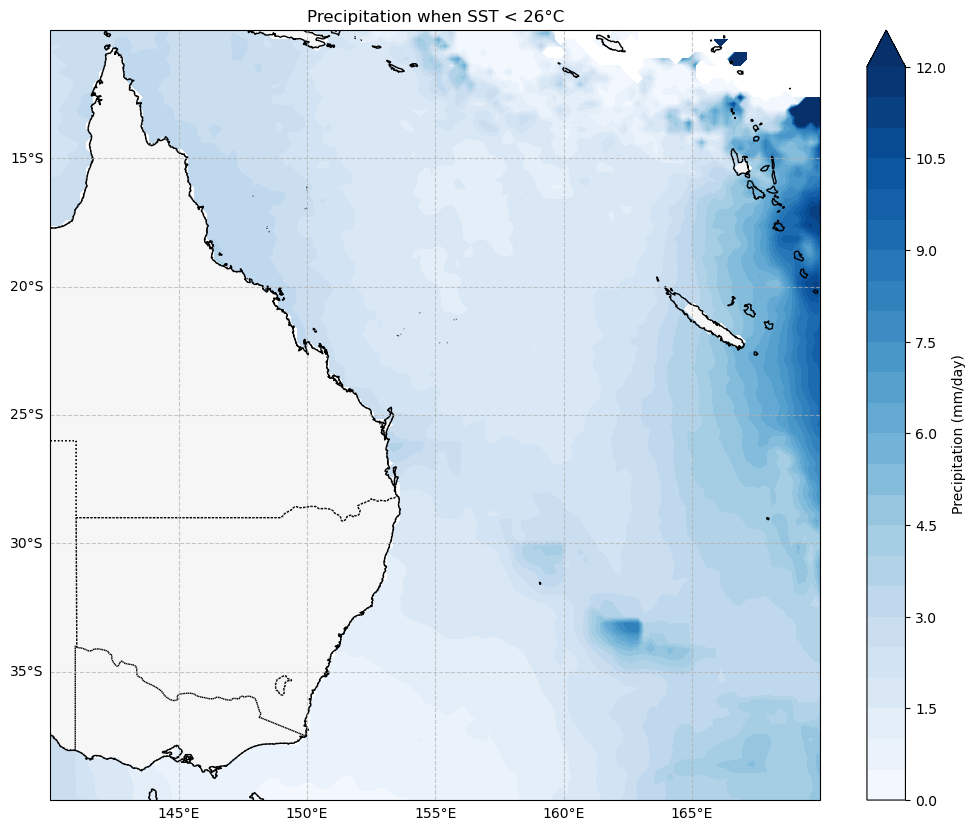

In [15]:
plt.figure(figsize=(12, 10))

# Use PlateCarree projection for Australia
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines, borders, and states
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, linestyle=':')

# Add ocean and land features
ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='lightblue', alpha=0)
ax.add_feature(cfeature.LAND, zorder=0, facecolor='lightgrey', alpha=0.2)

# Set the extent to focus on eastern Australia
ax.set_extent([140, 170, -40, -10], crs=ccrs.PlateCarree())

# Set levels to control the range (adjust max value as needed)
levels = np.linspace(0, 12, 25)  # 0 to 10 mm/day with 21 levels

# Create the contour plot
contour = ax.contourf(precip_sstbelow26.lon, precip_sstbelow26.lat, precip_sstbelow26.mean(dim='time'), 
                        levels=levels, cmap='Blues', extend='max',
                        transform=ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.7)
gl.top_labels = False
gl.right_labels = False
plt.title('Precipitation when SST < 26°C')
# Add colorbar
cbar = plt.colorbar(contour, label='Precipitation (mm/day)', pad=0.05, fraction=0.05)

